# This Notebook to run and merge 2 models.

First import the usual stuffs

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pyneb as pn
import pyCloudy as pc
pc.config.cloudy_exe = 'cloudy.exe'
models_dir = '../../Models/'

In [3]:
Teff = 50000. # K
QH = 47. # s-1 dex
distance = 1. # kpc

In [35]:
def make_mod(name, dens, ab_dict, r_in):
    """
    This routine to make Cloudy input file depending on various parameters.
    It prints out in the input file but not runs it.
    parameters:
        - name
        - dens
        - ab_dict
        - r_in
    """
    model = pc.CloudyInput('{}/{}'.format(models_dir, name))
    model.set_BB(Teff=Teff, lumi_unit='q(H)', lumi_value=QH)
    model.set_abund(ab_dict = ab_dict)
    model.set_radius(r_in)
    model.set_cste_density(dens)
    model.set_distance(distance, unit='kpc')
    model.set_stop(('temperature off', 'pfrac 0.02'))
    model.read_emis_file('ic418N.lines')
    
    model.print_input()
    print('Model {} printed'.format(name))

In [118]:
dens_a = 2
dens_b = 5
ab_dict_a = {'He':-1.00, 'C':-3.00, 'N':-3.35, 'O':-3.65 , 'Ne':-4.2, 'Mg':-4.45,
             'Si':-4.90, 'S':-4.65, 'Cl':-5.30, 'Ar':-5.3, 'Fe':-7.40}
ab_dict_b = {'He':-1.00, 'C':-3.00, 'N':-3.35, 'O':-3.65 , 'Ne':-4.2, 'Mg':-4.45,
             'Si':-4.90, 'S':-4.65, 'Cl':-5.30, 'Ar':-5.3, 'Fe':-7.40}
r_in_a = 16
r_in_b = 17

In [119]:
generic_name = 'Bi_1_'
make_mod(generic_name + 'a', dens_a, ab_dict_a, r_in_a)
make_mod(generic_name + 'b', dens_b, ab_dict_b, r_in_b)

Model Bi_1_a printed
Model Bi_1_b printed


In [120]:
pc.run_cloudy(dir_=models_dir, n_proc=2, model_name=generic_name)

In [121]:
Ma = pc.CloudyModel('{}/{}a'.format(models_dir, generic_name))
Mb = pc.CloudyModel('{}/{}b'.format(models_dir, generic_name))

In [122]:
Ma.print_stats()

 Name of the model: /DATA/NEBULATOM/Bi_1_a
 R_in (cut) = 1.000e+16 (1.000e+16), R_out (cut) = 1.842e+18 (1.842e+18)
 H+ mass = 1.93e+00, H mass = 2.19e+00
 <H+/H> = 0.95, <He++/He> = 0.00, <He+/He> = 0.92
 <O+++/O> = 0.00, <O++/O> = 0.39, <O+/O> = 0.56
 <N+++/O> = 0.00, <N++/O> = 0.46, <N+/O> = 0.51
 T(O+++) = 7177, T(O++) = 5879, T(O+) = 6310
 <ne> = 97, T0 = 6148, t2=0.0060
 <log U> = -2.63


In [123]:
Mb.print_stats()

 Name of the model: /DATA/NEBULATOM/Bi_1_b
 R_in (cut) = 1.000e+17 (1.000e+17), R_out (cut) = 1.003e+17 (1.003e+17)
 H+ mass = 2.45e-03, H mass = 3.60e-03
 <H+/H> = 0.88, <He++/He> = 0.00, <He+/He> = 0.84
 <O+++/O> = 0.00, <O++/O> = 0.04, <O+/O> = 0.83
 <N+++/O> = 0.00, <N++/O> = 0.07, <N+/O> = 0.86
 T(O+++) = 8005, T(O++) = 7949, T(O+) = 7988
 <ne> = 74960, T0 = 7951, t2=0.0017
 <log U> = -3.58


In [124]:
def sum_comp(Ma, Mb, wa=.5):
    Hb_a = wa*Ma.get_emis_vol('H__1__4861A')
    Hb_b = (1-wa)*Mb.get_emis_vol('H__1__4861A')
    print('LINE         : COMP_A   COMP_B   SUM')
    for label in Ma.emis_labels:
        intens_a = wa*Ma.get_emis_vol(label)
        intens_b = (1-wa)*Mb.get_emis_vol(label)
        print('{:12s} : {:7.4f} {:7.4f} {:7.4f}'.format(label, 
                                                 intens_a/Hb_a, 
                                                 intens_b/Hb_b,
                                                 (intens_a+intens_b)/
                                                 (Hb_a+Hb_b)))

In [125]:
sum_comp(Ma, Mb, 0.9)

LINE         : COMP_A   COMP_B   SUM
H__1__3835A  :  0.0725  0.0863  0.0738
H__1__3970A  :  0.1563  0.1599  0.1567
H__1__4102A  :  0.2543  0.2574  0.2546
H__1__4340A  :  0.4615  0.4666  0.4620
H__1__4861A  :  1.0000  1.0000  1.0000
H__1__6563A  :  3.0480  2.8627  3.0301
HE_1__4471A  :  0.0515  0.0494  0.0513
HE_1__5876A  :  0.1575  0.1506  0.1569
HE_1__6678A  :  0.0451  0.0416  0.0447
C__1__8727A  :  0.0008  0.0161  0.0022
C__2__4267A  :  0.0076  0.0037  0.0072
N__1__5198A  :  0.0180  0.0102  0.0172
N__1__5200A  :  0.0246  0.0060  0.0228
N__2__5755A  :  0.0121  0.2231  0.0324
N__2__6548A  :  1.0394  1.7642  1.1091
N__2__6584A  :  3.0671  5.2065  3.2728
O__1__5577A  :  0.0001  0.0008  0.0001
O__1__6300A  :  0.0113  0.0764  0.0176
O_II__3726A  :  0.1399  0.0893  0.1351
O_II__3729A  :  0.1868  0.0345  0.1722
O_II__7323A  :  0.0011  0.0594  0.0067
O_II__7332A  :  0.0009  0.0481  0.0054
TOTL__4363A  :  0.0002  0.0004  0.0002
O__3__4959A  :  0.0945  0.0348  0.0887
O__3__5007A  :  0.2844  0.1

In [126]:
cloudy2pyneb = pc.utils.misc.cloudy2pyneb()
print cloudy2pyneb

{'N__3_5721M': ['N3', '57.4m'], 'AR_3__7135A': ['Ar3', '7136A'], 'H__1__3750A': ['H1', '3750A'], 'O_II__3729A': ['O2', '3729A'], 'NE_3__3968A': ['Ne3', '3968A'], 'O__3_8833M': ['O3', '87.6m'], 'H__1__3771A': ['H1', '3771A'], 'N__2__4026A': ['N2', '4026A'], 'N__2__6548A': ['N2', '6548A'], 'H__1__4102A': ['H1', '4101A'], 'S__3__6312A': ['S3', '6312A'], 'N__4__1485A': ['N4', '1485A+'], 'H__1__6563A': ['H1', '6563A'], 'H__1__3835A': ['H1', '3835A'], 'O_II__7323A': ['O2', '7319A+'], 'TOTL__3727A': ['O2', '3727A+'], 'HE_1__5016A': ['He1', '5016A'], 'O_II__7332A': ['O2', '7330A+'], 'AR_4__7171A': ['Ar4', '7170A'], 'N_2R__5755A': ['N2', '5755Ar'], 'N__2_2054M': ['N2', '205.4m'], 'AR_2_6980M': ['Ar2', '7.0m'], 'O__3__5007A': ['O3', '5007A'], 'HE_2__4686A': ['He2', '4686A'], 'H__1__4340A': ['H1', '4340A'], 'AR_4__4740A': ['Ar4', '4740A'], 'H__1__3798A': ['S3', '3798A'], 'AR_3__7751A': ['Ar3', '7751A'], 'S__3_3347M': ['S3', '33.6m'], 'AR_5_8000M': ['Ar5', '7.9m'], 'N__2_1217M': ['N2', '121.5m'], 

In [127]:
def make_fake_obs(Ma, Mb, wa=0.5):
    obs = pn.Observation()
    Hb_a = wa*Ma.get_emis_vol('H__1__4861A')
    Hb_b = (1-wa)*Mb.get_emis_vol('H__1__4861A')
    for label in Ma.emis_labels:
        i_a = wa*Ma.get_emis_vol(label)
        i_b = (1-wa)*Mb.get_emis_vol(label)
        i_tot = (i_a+i_b)/(Hb_a+Hb_b)
        try:
            atom, line = cloudy2pyneb[label]
            wave = float(line[:-1])
            if line[-1] == 'm':
                wave *= 1e4
            elem, spec = pn.utils.misc.parseAtom(atom)
            obs.addLine(pn.EmissionLine(elem, spec, wave,
                                        obsIntens=[i_a, i_b, i_tot]))
        except:
            pass
    obs.correctData()
    return obs

In [128]:
obs = make_fake_obs(Ma, Mb, wa=0.9)

warng EmissionLine: Atom H1 not valid
warng EmissionLine: Atom H1 not valid
warng EmissionLine: Atom H1 not valid
warng EmissionLine: Atom H1 not valid
warng EmissionLine: Atom H1 not valid
warng EmissionLine: Atom H1 not valid
warng EmissionLine: Atom He1 not valid
warng EmissionLine: Atom He1 not valid
warng EmissionLine: Atom He1 not valid
warng EmissionLine: line 4267A for atom C2 not valid
warng EmissionLine: line 121.5m for atom N2 not valid
warng EmissionLine: line 87.6m for atom O3 not valid
warng EmissionLine: line 33.6m for atom S3 not valid


In [129]:
diags = pn.Diagnostics()
diags.addDiagsFromObs(obs)

In [130]:
emisgrids = pn.getEmisGridDict(atomDict=diags.atomDict)

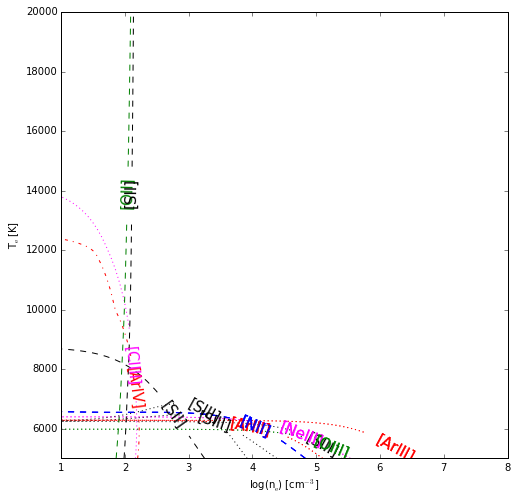

In [131]:
f, ax = plt.subplots(figsize=(8, 8))
diags.plot(emisgrids, obs, ax=ax, i_obs=0)

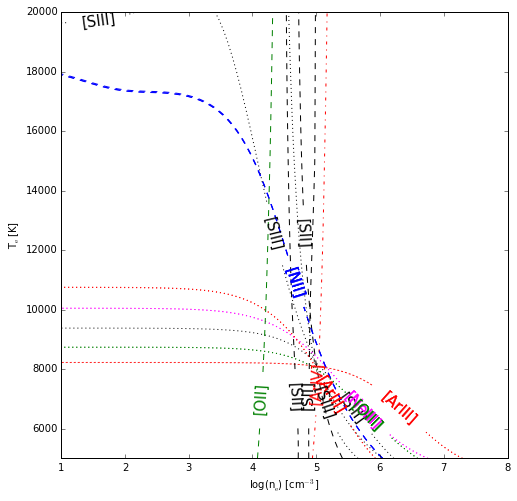

In [132]:
f, ax = plt.subplots(figsize=(8, 8))
diags.plot(emisgrids, obs, ax=ax, i_obs=1)

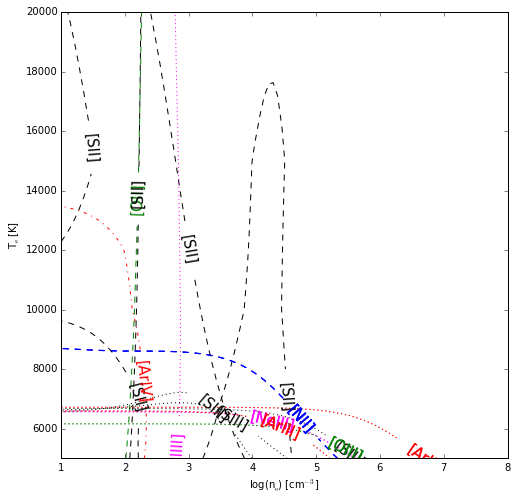

In [133]:
f, ax = plt.subplots(figsize=(8, 8))
diags.plot(emisgrids, obs, ax=ax, i_obs=2)